## **Implementation of image segmentation unsig k-Means algorithm**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import warnings
warnings.filterwarnings('ignore')

In [3]:
im = cv2.resize(cv2.imread('image1.jpg',0), (512,512))


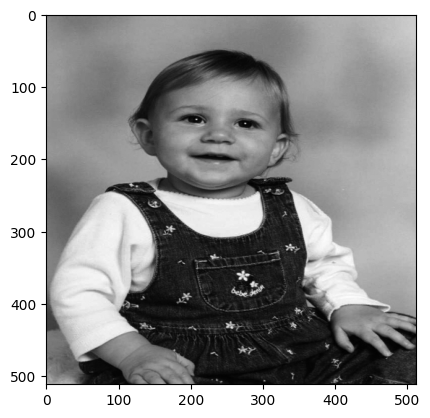

In [5]:
plt.imshow(im,cmap='gray')
plt.show()

In [6]:
pixels=im.reshape(im.size,1)
pixels
k = 5

In [7]:
inertia=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit(pixels)
    inertia.append(km.inertia_)

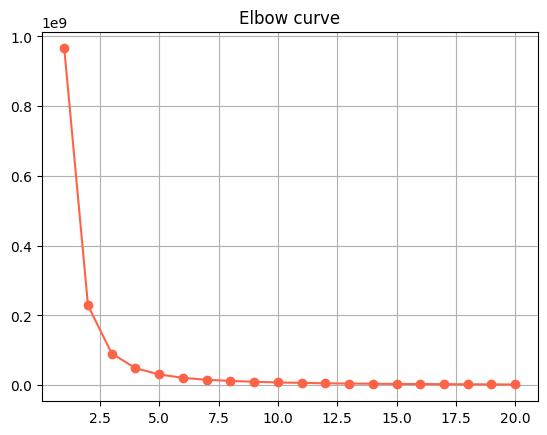

In [8]:
plt.plot(range(1,21),inertia,color='tomato', marker='o')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

In [9]:
km=KMeans(n_clusters=k)

In [10]:

km.fit(pixels)

KMeans(n_clusters=5)

In [11]:
km.inertia_

30915434.0945868

In [12]:
km.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [13]:
pixels.shape

(262144, 1)

In [14]:
df=pd.DataFrame(data=im.ravel(),columns=["Pixel"])
df['Cluster']=km.labels_

In [15]:
df.head()

,Pixel,Cluster
0,126,2
1,127,2
2,127,2
3,128,2
4,124,2


In [16]:
pixrange=[]
for i in range(k):
    m1=df[df.Cluster==i]["Pixel"].max()
    m2=df[df.Cluster==i]["Pixel"].min()
    pixrange.append((m1,m2))

In [17]:

pixrange

[(107, 58), (186, 145), (144, 108), (57, 7), (235, 187)]

In [18]:
def assignnew(x,list1):
     for i in range(len(list1)):
            if x<=list1[i][0] and x>=list1[i][1]:
                return i

In [19]:

df['Caption']=df['Pixel'].apply(assignnew,args=[pixrange])
df

,Pixel,Cluster,Caption
0,126,2,2
1,127,2,2
2,127,2,2
3,128,2,2
4,124,2,2
...,...,...,...
262139,67,0,0
262140,61,0,0
262141,45,3,3
262142,35,3,3


In [20]:
new_Image = np.array(df['Caption']).reshape(im.shape)

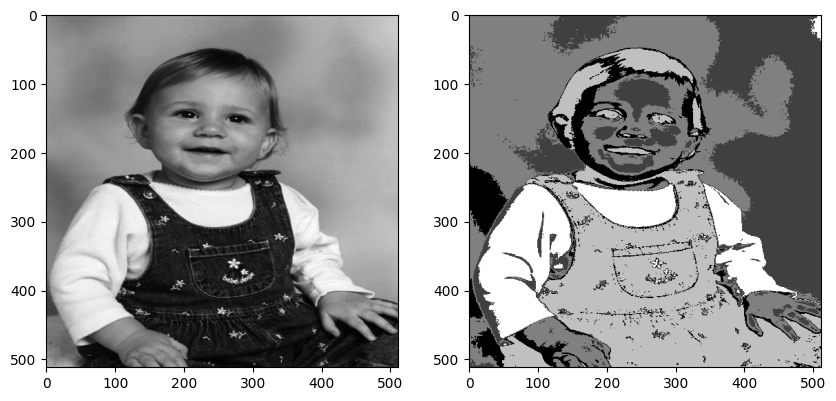

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_Image, cmap='gray')
plt.show()